In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

df = pd.read_csv('data/articles.zip')

## Лабораторная работа. Знакомство с библиотеками для анализа данных

### О задании

Лабораторная работа направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций.

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [2]:
def construct_array(X: np.ndarray, indices1, indices2) -> np.ndarray: 
    return X[indices1, indices2]

NameError: name 'np' is not defined

In [3]:
X = np.arange(0, 16).reshape(4, 4)
i_1 = np.arange(0, 4)
i_2 = np.arange(0, 4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [1]:
construct_array(X, i_1, i_2)

NameError: name 'construct_array' is not defined

In [4]:
assert np.array_equal(np.arange(0, 16, 5), construct_array(X, i_1, i_2))

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [5]:
def detect_identic(X: np.ndarray, Y: np.ndarray) -> bool:
    return np.array_equal(X, Y)

In [6]:
def test_detect(X, Y):
    if X.shape != Y.shape:
        return False
    return np.alltrue(X == X)

In [7]:
a = np.array([1, 2, 3])

In [8]:
detect_identic(X, a)

False

In [9]:
assert detect_identic(X, X) == test_detect(X, X)

In [10]:
assert detect_identic(X, a) == test_detect(X, a)

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [56]:
# 3х мерный тензор - три двумерные матрицы
X_3d = np.reshape(np.arange(0, 60), (3, 5, 4))
X_3d

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]],

       [[20, 21, 22, 23],
        [24, 25, 26, 27],
        [28, 29, 30, 31],
        [32, 33, 34, 35],
        [36, 37, 38, 39]],

       [[40, 41, 42, 43],
        [44, 45, 46, 47],
        [48, 49, 50, 51],
        [52, 53, 54, 55],
        [56, 57, 58, 59]]])

In [134]:
def mean_channel(X):
    return np.mean(X, axis=(1, 2))

In [135]:
def test_mean_channel(start, stop):
    return )

In [136]:
# list comprehension использовался для тестов, легитимно
assert all(mean_channel(X_3d) == [test_mean_channel(0 + 20*i, 20 + 20*i) for i in range(3)])

**(0.25 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [88]:
X = np.arange(0,10).reshape((2, 5))

In [131]:
def nearest_value(X, a):
    diff = abs(X - a)
    return X[np.where(diff == diff.min())][0]

In [133]:
assert nearest_value(X, 3.6) == 4

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [151]:
x, y = np.arange(0, 10), np.arange(10, 20)
x, y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

In [165]:
def construct_matrix(x, y):
    return np.hstack((x[:, np.newaxis], y[:, np.newaxis]))    

In [193]:
assert np.all(construct_matrix(x, y) == np.vstack((x, y)).T)

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [197]:
array = np.array([1, -5, 3])

In [216]:
def add_zeros(x: np.ndarray):
    size = x.shape[0] - 1
    if not size:
        return x
    size += x.shape[0]
    result = np.zeros(size, dtype=x.dtype)
    result[::2] = x
    return result

In [209]:
assert np.allclose(add_zeros(array), [1, 0, -5, 0, 3])  # compare with float array

In [217]:
add_zeros(np.array([1, 1, 1, 1, 1]))

array([1, 0, 1, 0, 1, 0, 1, 0, 1])

In [199]:
array.shape

(3,)

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [220]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
X

array([[1, 0, 1],
       [2, 0, 2],
       [3, 0, 3],
       [4, 4, 4]])

In [253]:
def nonzero_product(X):
    diag = np.diag(X).copy()
    if not np.any(diag):
        return None
    diag[diag == 0] = 1
    return np.prod(diag)

In [256]:
assert nonzero_product(X) == 3

In [259]:
assert nonzero_product(np.zeros((3, 3))) is None

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [270]:
X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

In [294]:
def max_element(X):
    down = X[:-1]
    if 0 not in down:
        return None
    return X[1:][np.where(down == 0)].max()

In [296]:
assert max_element(X) == 5

In [297]:
assert max_element([None, None]) is None

In [299]:
assert max_element([2, 0]) is None

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [300]:
def get_unique_rows(X):
    return np.unique(X, axis=0)

In [301]:
X = [[1, 2, 3], [1, 2, 4], [2, 3, 4], [1, 2, 3]]

In [304]:
assert np.all(get_unique_rows(X) == [[1, 2, 3], [1, 2, 4], [2, 3, 4]])

**(0.75 балла) Задача 10.** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [360]:
X = np.arange(1, 20, dtype=float)
test_mean = np.mean(X)
test_X = np.array(list(X) + [np.NaN, np.NaN])
X = np.array(list(X) + [test_mean, test_mean])
X, test_X

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 10., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., nan, nan]))

In [367]:
def replace_nans(X: np.ndarray):
    if np.all(np.isnan(X)):
        return np.zeros(X.shape)
    mean = np.nanmean(X)
    X[np.isnan(X)] = mean
    return X

In [368]:
assert np.all(np.isclose(replace_nans(test_X), X))

In [372]:
assert np.all(replace_nans(np.array([np.NaN, np.NaN])) == [0, 0])

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [389]:
X = np.array([1, 2, 3])[:, np.newaxis]
res = np.power(X, [0, 1, 2])
res

array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]], dtype=int32)

In [392]:
def vander(x):
    x = x[:, np.newaxis]
    power = np.arange(len(x))
    return np.power(x, power)

In [395]:
assert np.all(vander(np.array([1, 2, 3])) == res)

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [4]:
X = np.arange(0, 20).reshape(5, 4)
Y = np.ones((10, 4))

In [5]:
def dist_loop(X: np.ndarray, Y: np.ndarray):
    rows, columns = X.shape[0], Y.shape[0]
    dists = np.zeros((rows, columns))
    del_Y = np.power(np.sum(np.power(Y, 2), axis=1), 0.5)
    for i in range(rows):
        line = np.sum(X[i, :] * Y, axis=1)
        del_X = np.power(np.sum(np.power(X[i, :], 2)), 0.5)
        dists[i, :] = line / (del_X * del_Y)
    return dists

In [6]:
dist_loop(X, Y)

array([[0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373,
        0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373],
       [0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789,
        0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789],
       [0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591,
        0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591],
       [0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819,
        0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819],
       [0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541,
        0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541]])

In [7]:
def dist_no_loops(X, Y):
    dist = np.sum(X[:, np.newaxis, :] * Y, axis=2)
    dist /= np.power(np.sum(np.power(X, 2), axis=1), 0.5)[:, np.newaxis]
    dist /= np.power(np.sum(np.power(Y, 2), axis=1), 0.5)
    return dist

In [8]:
dist_no_loops(X, Y)

array([[0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373,
        0.80178373, 0.80178373, 0.80178373, 0.80178373, 0.80178373],
       [0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789,
        0.97995789, 0.97995789, 0.97995789, 0.97995789, 0.97995789],
       [0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591,
        0.99314591, 0.99314591, 0.99314591, 0.99314591, 0.99314591],
       [0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819,
        0.99658819, 0.99658819, 0.99658819, 0.99658819, 0.99658819],
       [0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541,
        0.99796541, 0.99796541, 0.99796541, 0.99796541, 0.99796541]])

In [479]:
assert np.all(np.isclose(dist_no_loops(X, Y), dist_loop(X, Y)))

In [510]:
%%timeit -n 1000
dist_no_loops(X, Y)

66.3 µs ± 17.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [511]:
%%timeit -n 1000
dist_loop(X, Y)

239 µs ± 35.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**(1 балл) Задача 13.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [492]:
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [489]:
def scale(X):
    std = X.std(axis=0)
    if not np.all(std):
        return None
    mean = X.mean(axis=0)
    return (X - mean) / std
    

In [495]:
scale(X)

array([[-1.41421356, -1.41421356, -1.41421356, -1.41421356],
       [-0.70710678, -0.70710678, -0.70710678, -0.70710678],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356,  1.41421356,  1.41421356]])

In [498]:
assert scale(np.zeros((2, 3))) is None

**(1 балл) Задача 14.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/), а также [tqdm_notebook](https://habrahabr.ru/post/276725/) - для отслеживания прогресса.

In [544]:
X = np.arange(1, 28).reshape((3, 3, 3))
Y = np.ones((3, 3, 3))
res = X @ Y
res

array([[[ 6.,  6.,  6.],
        [15., 15., 15.],
        [24., 24., 24.]],

       [[33., 33., 33.],
        [42., 42., 42.],
        [51., 51., 51.]],

       [[60., 60., 60.],
        [69., 69., 69.],
        [78., 78., 78.]]])

In [7]:
def create_matrix(N):
    first = np.random.normal(size=(N, N, N))
    second = np.random.normal(size=(N, N, N))
    max_matr = (first @ second).max(axis=(1,2))
    return max_matr

In [8]:
def test_create_matrix(N):
    result = np.array(
        [(np.random.normal(size=(N, N)).dot(np.random.normal(size=(N, N)))).max() for _ in range(N)]
    )
    return result

In [14]:
%%time
maxes = create_matrix(300)

Wall time: 3 s


In [13]:
%%time
test_maxes = test_create_matrix(300)

Wall time: 3.36 s


In [21]:
print('mean of max:', maxes.mean(), "| test case:", test_maxes.mean())
print("95 percentile:", np.percentile(maxes, 0.95), "| test case:", np.percentile(test_maxes, 0.95))

mean of max: 76.0958159127766 | test case: 76.56073292618868
95 percentile: 68.57718925093829 | test case: 68.42628015192166


### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите таблицу с данными из ```articles.csv```. Удалите записи, в которых присутствуют пропуски.


**(0.5 балла) Задача 15.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [15]:
import pandas as pd

In [64]:
df = pd.read_csv('data/articles.zip')

In [24]:
df.head()

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date  year  month  \
0                     Carl Hulse  2016-12-31  2016     12   
1  Benjamin Mueller and Al Baker  2017-06-19  2017      6   
2                   Margalit Fox  2017-01-06  2017      1   
3               William McDonald  2017-04-10  2017      4   
4                  Choe Sang-Hun  2017-01-02  2017      1   

                                             content  
0  WASHINGTON  —   Congressional Republicans have...  
1  After the bullet shells get counted, the blood...  
2  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  Death may be the great equalizer, but it isn’t...  
4  SEOUL, South Korea  —   North Korea’s leader, ...

In [28]:
df["data"] = pd.to_datetime(df.date)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           50000 non-null  int64         
 1   title        50000 non-null  object        
 2   publication  50000 non-null  object        
 3   author       43694 non-null  object        
 4   date         50000 non-null  object        
 5   year         50000 non-null  int64         
 6   month        50000 non-null  int64         
 7   content      50000 non-null  object        
 8   data         50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.4+ MB


In [195]:
df.isna().sum()

id                0
title             0
publication       0
author         6306
date              0
year              0
month             0
content           0
dtype: int64

In [36]:
# определите количество различных издательств в таблице;
df.publication.nunique()

5

In [52]:
# найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
((df.date >= "2016-06-01") & (df.date <= "2016-12-31")).value_counts()[True]

19408

In [68]:
# посчитайте распределение статей автора Tom Ciccotta по годам;
df[df.author == "Tom Ciccotta"]["year"].value_counts()

2017    132
2016    124
Name: year, dtype: int64

In [74]:
# найдите месяц, в котором было наибольшее число статей;
df.month.value_counts()[:1]

1    5905
Name: month, dtype: int64

In [78]:
# найдите месяц, в котором было наибольшее число статей;
df["year-month"] = df.year.astype(str) + "-" + df.month.astype(str)
df["year-month"].value_counts()[:1]

2017-1    3655
Name: year-month, dtype: int64

либо первый месяц, либо первый месяц 2017 года

In [86]:
# выпишите 3 первые статьи автора John Hayward в 2016 году.
df[(df.author == "John Hayward") & (df.year == 2016)].sort_values("date").head(3)

id                                              title publication  \
16861  35600  Indonesian Couple Beaten with Canes for Violat...   Breitbart   
22041  40791  Islamic State Claims Credit For Gun Attack On ...   Breitbart   
27561  46325  Protests Across India Against Saudi Execution ...   Breitbart   

             author        date  year  month  \
16861  John Hayward  2016-01-01  2016      1   
22041  John Hayward  2016-01-01  2016      1   
27561  John Hayward  2016-01-04  2016      1   

                                                 content year-month  
16861  Islamic sharia law was enforced with canes onc...     2016-1  
22041  The Islamic State has claimed responsibility f...     2016-1  
27561  Protests over Saudi Arabia’s execution of Shii...     2016-1

**Работа со строками в датафрейме.**

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 16.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [4]:
authors = df.author.dropna()
series = authors[authors.str.contains("Faith", regex=False)]
pd.Series(series.unique())

0     Faith Haleh Robinson
1             Faith Karimi
2     Faith Haleh Robinson
3            Faith Karimi,
4            Faith Karimi 
5           Faith Karimi, 
6             Faith Karimi
7            Faith Karimi 
dtype: object

**(1 балл) Задача 17.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [77]:
def clean_series(series: pd.Series):
    return series.str.lower().str.replace("[^\w\s]", "").str.strip().str.replace("\s+", " ")

In [76]:
test_answer = "its 6 am and im still doing this homework"
assert clean_series(pd.Series(["   It's 6 a.m. and I'm still doing this homework :((    "]))[0] == test_answer

In [144]:
df["author"] = clean_series(df.author)
df["content"] = clean_series(df.content)

In [80]:
# Подсчитайте статистику для имени Faith из прошлого задания. 
# Проверьте, что теперь различные способы написания «схлопываются» в один.

clean_series(series).unique()

array(['faith haleh robinson', 'faith karimi'], dtype=object)

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 18.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [188]:
gb = df[["author", "year", "id"]].groupby(
    ["author", "year"]
).count().reset_index().sort_values(
    "id",
    ascending=False
).drop_duplicates(
    subset="author"
)
gb.head(20)

author  year    id
649        breitbart news  2016  1317
3627              pam key  2016   820
832      charlie spiering  2016   660
144           alex swoyer  2016   584
1048      daniel nussbaum  2016   532
483           awr hawkins  2016   525
2195         john hayward  2016   521
2072        jerome hudson  2016   482
1771         ian hanchett  2016   429
2162        joel b pollak  2016   417
1987            jeff poor  2016   323
4701   warner todd huston  2016   316
4634          trent baker  2016   280
3669       patrick howley  2016   259
646      breitbart london  2016   258
1546       frances martel  2016   257
820          charlie nash  2016   254
2493  katherine rodriguez  2017   231
533               ben kew  2016   221
8             aaron klein  2016   209

**(1 балл) Задача 19.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

**Hint**. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [300]:
gb = df[["publication", "date", "id"]].groupby(["publication", "date"]).count()
gb["cumsum"] = gb.groupby(level=0).cumsum()
gb.drop(columns="id", inplace=True)
gb.reset_index(inplace=True)
gb.head(14)

publication        date  cumsum
0     Atlantic  2016-12-30      19
1     Atlantic  2016-12-31      23
2     Atlantic  2017-01-01      26
3     Atlantic  2017-01-02      28
4     Atlantic  2017-01-03      55
5     Atlantic  2017-01-04      73
6     Atlantic  2017-01-05      74
7     Atlantic  2017-01-06     104
8     Atlantic  2017-01-07     109
9     Atlantic  2017-01-08     112
10    Atlantic  2017-01-09     135
11    Atlantic  2017-01-10     154
12    Atlantic  2017-01-11     171
13   Breitbart  2013-03-10       1

In [304]:
answer = pd.merge(df, gb, how="outer")
answer.sort_values("date")

id                                              title publication  \
39087  58867  Merck to pay $950 million for illegal marketin...         CNN   
41994  63091  Mary Ellen Mark’s portraits from high school p...         CNN   
42694  64208      Our favorite movie superheroes (and villains)         CNN   
38636  58311        Opinion: Prostate screening’s false promise         CNN   
42312  63551                               Triple Crown winners         CNN   
...      ...                                                ...         ...   
36124  55199            Otto Warmbier’s family declines autopsy         CNN   
36123  55198  Don’t lose sleep over apnea, but treatment is ...         CNN   
36122  55197  In Georgia, close isn’t nearly good enough for...         CNN   
36119  55191  Psaki: Democrats, don’t lose your cool over Ge...         CNN   
36128  55207  Slain Muslim girl may have been sexually assau...         CNN   

                   author        date  year  month  \
39087                 NaN  2011-11-22  2011     11   
41994  emanuella grinberg  2012-04-18  2012      4   
42694                 NaN  2012-05-03  2012      5   
38636                 NaN  2012-05-22  2012      5   
42312                 NaN  2012-06-07  2012      6   
...                   ...         ...   ...    ...   
36124  emanuella grinberg  2017-06-21  2017      6   
36123                 NaN  2017-06-21  2017      6   
36122      chris cillizza  2017-06-21  2017      6   
36119                 NaN  2017-06-21  2017      6   
36128       chris boyette  2017-06-21  2017      6   

                                                 content  title_len  cumsum  
39087  washington cnn pharmaceutical giant merck will...         56       1  
41994  prom the 2012 book from legendary documentary ...         50       2  
42694  so many superheroes have come to the screen he...         45       3  
38636  cnn should men be routinely screened for prost...         43       4  
42312  a look at the 12 horses whove managed to take ...         20       5  
...                                                  ...        ...     ...  
36124  cnn the family of american college student ott...         39   11488  
36123  cnn last week actress carrie fishers autopsy r...         53   11488  
36122  cnn winning isnt everything in politics its th...         56   11488  
36119  cnn democrats dont lose your mind and your mot...         56   11488  
36128  cnn a muslim teen who was attacked and killed ...         62   11488  

[50000 rows x 10 columns]

### Визуализация

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 20.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.



In [197]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

In [199]:
X, Y, error = gen_uncertain_data()

In [205]:
plt.figure(dpi=100)
plt.fill_between(X, Y-error, Y+error);
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Example");

**(0.5 балла) Задача 21.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


In [256]:
df.publication.value_counts().plot.pie(
    figsize=(7, 7),
    textprops={'fontsize': 14}
);
plt.title("Pie plot", fontsize=14);


**(0.5 балла) Задача 22.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

In [259]:
gb = df[["publication", "year", "id"]].groupby(["publication", "year"]).count()
gb.plot.bar(figsize=(15, 7))
plt.title("Bar plot");

In [263]:
gb.idxmax()

id    (Breitbart, 2016)
dtype: object

In [267]:
df[["year", "id"]].groupby("year").count().idxmax()

id    2016
dtype: int64

**(0.5 балла) Задача 23.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

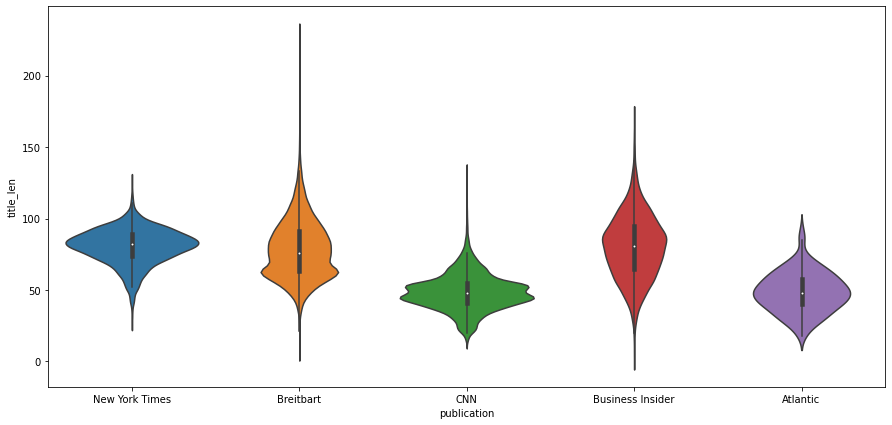

In [258]:
import seaborn as sns

df["title_len"] = df.title.str.len()
plt.figure(figsize=(15, 7))
sns.violinplot(x=df.publication, y=df.title_len);